#

<h1 style="text-align: center;">CUSTOMER LOYALTY ANALYSIS - TURTLE GAMES</h1>

#

# Introduction
The purpose of this project is to explore customer loyalty at Turtle Games, a global producer and retailer of gaming merchandise. Using Python, the analysis investigates how customer behaviour, specifically age, income, and expenditure score relates to the accumulation of loyalty points. This exploratory phase leverages regression modelling and data visualisation techniques to uncover meaningful insights about customer engagement.

This notebook focuses on evaluating core consumer trends to support loyalty strategy development. While more advanced techniques like sentiment analysis may be applied in later stages, this phase lays the foundation by understanding fundamental spending behaviours.

---

# Objectives
  The key objectives of this analysis are:
- Understand how customers engage with and accumulate loyalty points.
- Explore the relationships between age, income, and spending behaviour.
- Use regression modelling to quantify the impact of key factors on loyalty point accumulation.
- Establish baseline insights to inform and optimise loyalty and customer retention strategies at Turtle Games.

---

# Dataset Overview
The following datasets are used in this analysis:
1. **turtle_reviews.csv**: Details on customer gender, age, remuneration, spending score, loyalty points, education, language, platform, review and summary across products.

# Prepare Workstation

In [164]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import seaborn as sns
import string

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.stats import norm

import warnings

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aretaspetronis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aretaspetronis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aretaspetronis/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#

# Exploratory Data Analysis (EDA)
We explore the distribution of key variables such as loyalty points, spending score, age, and income. This helps us identify trends and outliers.

In [165]:
# Load the CSV file as reviews
data_path = "/Users/aretaspetronis/Desktop/Data Analytics/Files/Course 3/assignment_files/turtle_reviews.csv"
df = pd.read_csv(data_path)

# Show the first few rows of the dataframe
df.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [166]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Calculate percentage of missing values per column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)

Missing values in each column:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

Percentage of missing values per column:
gender                    0.0
age                       0.0
remuneration (k£)         0.0
spending_score (1-100)    0.0
loyalty_points            0.0
education                 0.0
language                  0.0
platform                  0.0
product                   0.0
review                    0.0
summary                   0.0
dtype: float64


# Explore and clean the data

In [167]:
# Explore the data (summary statistics, data types)
print("Basic Info:")
df.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB

Summary Statistics:
               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        

In [168]:
# Descriptive statistics (mean, std, min, max, etc.)
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


In [169]:
# Drop unnecessary columns
df = df.drop(columns=['platform', 'language'])

# View column names 
print("Remaining Columns:")
print(df.columns)

Remaining Columns:
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


In [170]:
# Rename the column headers
df = df.rename(columns={'remuneration (k€)': 'income',
                        'spending_score (1-100)': 'spend_score'})

# View column names 
print("Renamed Columns:")
print(df.columns)

Renamed Columns:
Index(['gender', 'age', 'remuneration (k£)', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


In [171]:
# Create a CSV file as output
df.to_csv('cleaned_turtle_reviews.csv', index=False)

In [172]:
# Import new CSV file with Pandas.
new_df = pd.read_csv('cleaned_turtle_reviews.csv')
print("New DataFrame:")


# View Dataframes
print(new_df.head())

New DataFrame:
   gender  age  remuneration (k£)  spend_score  loyalty_points education  \
0    Male   18              12.30           39             210  graduate   
1    Male   23              12.30           81             524  graduate   
2  Female   22              13.12            6              40  graduate   
3  Female   25              13.12           77             562  graduate   
4  Female   33              13.94           40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeo

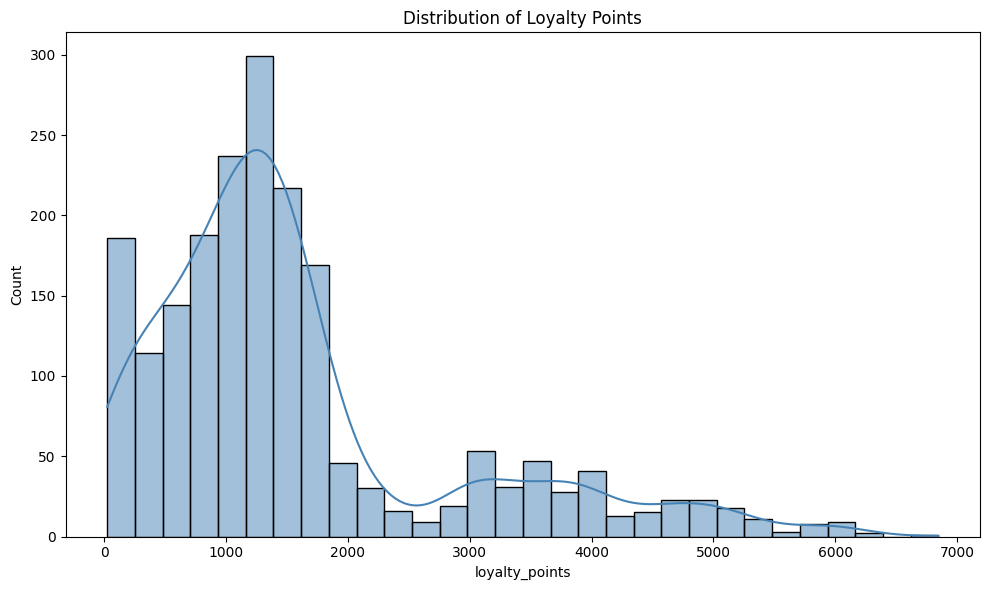

In [173]:
# Distribution of loyalty points before modeling
plt.figure(figsize=(10, 6))
sns.histplot(df['loyalty_points'], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribution of Loyalty Points')
plt.xlabel('loyalty_points')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

####

# Linear regression

### Spending vs Loyalty

In [174]:
# Rename the column 'remuneration (k€)' to 'income'
df = df.rename(columns={'remuneration (k€)': 'income'})

# Check the column names
print(df.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


In [175]:
# Define the independent and dependent variables
X = df[['spend_score']]
y = df['loyalty_points']

# Add a constant term to the predictors
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

In [176]:
# Extract the estimated parameters.
params = results.params
print("\nEstimated Parameters (Coefficients):")
print(params)

# Extract the standard errors.
std_errors = results.bse
print("\nStandard Errors:")
print(std_errors)

# Extract the predicted values.
predicted_values = results.fittedvalues
print("\nPredicted Values:")
print(predicted_values)


Estimated Parameters (Coefficients):
const         -75.052663
spend_score    33.061693
dtype: float64

Standard Errors:
const          45.930554
spend_score     0.814419
dtype: float64

Predicted Values:
0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Length: 2000, dtype: float64


In [177]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = pd.DataFrame({
    'Observed': y,
    'Predicted': predicted_values,
    'Residuals': y - predicted_values
})

print("\nRegression Table:")


# View the output.
print(regression_table.head())


Regression Table:
   Observed    Predicted    Residuals
0       210  1214.353374 -1004.353374
1       524  2602.944491 -2078.944491
2        40   123.317497   -83.317497
3       562  2470.697718 -1908.697718
4       366  1247.415067  -881.415067


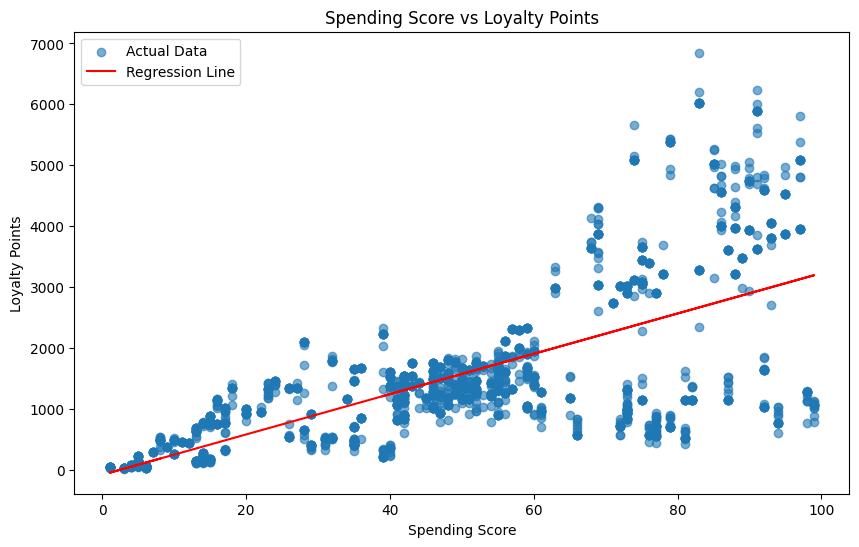

In [178]:
# Plot the graph with a regression line.
plt.figure(figsize=(10, 6))
plt.scatter(X['spend_score'], y, color='#1f77b4', alpha=0.6, label='Actual Data') 
plt.plot(X['spend_score'], predicted_values, color='red', label='Regression Line')
plt.title('Spending Score vs Loyalty Points')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
X_cluster = df[['spend_score', 'income']]  # or df[['spending_score', 'remuneration']] if named differently

# Scale data if needed (optional, depends on your variable range)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Run KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='spend_score', y='income', hue='cluster', palette='tab10')
plt.title('Customer Clusters Based on Spending Score and Remuneration')
plt.xlabel('Spending Score [0–100]')
plt.ylabel('Remuneration (£k)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loyalty_points', hue='cluster', bins=30, element='step', stat='count', common_norm=False, palette='tab10')
plt.title('Loyalty Points Distribution by Customer Type')
plt.xlabel('Loyalty Points')
plt.ylabel('Frequency')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


### Renumeration vs Loyalty

In [ ]:
# Rename the column 'remuneration (k€)' to 'income'
df = df.rename(columns={'remuneration (k€)': 'income'})

# Define independent variable (X)
X_b = df[['remuneration (k£)']]


# Define dependent variable (y)
y_b = df['loyalty_points'] 


# Create model and print summary of metrics
model_b = sm.OLS(y_b, sm.add_constant(X_b))  # OLS regression (adding a constant for intercept)
results_b = model_b.fit()

# View the summary of the regression model
print(results_b.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.43e-209
Time:                        11:19:26   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -65.6865     52.17

In [ ]:
# Extract the estimated parameters.
params_b = results_b.params
print("\nEstimated Parameters (Coefficients):")
print(params_b)

# Extract the standard errors.
std_errors_b = results_b.bse
print("\nStandard Errors:")
print(std_errors_b)

# Extract the predicted values.
predicted_values_b = results_b.fittedvalues
print("\nPredicted Values:")
print(predicted_values_b)


Estimated Parameters (Coefficients):
const               -65.686513
remuneration (k£)    34.187825
dtype: float64

Standard Errors:
const                52.170717
remuneration (k£)     0.977925
dtype: float64

Predicted Values:
0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Length: 2000, dtype: float64


In [ ]:
# Set the the X coefficient and the constant to generate the regression table.
regression_table_b = pd.DataFrame({
    'Observed': y_b,
    'Predicted': predicted_values_b,
    'Residuals': y_b - predicted_values_b
})

# View the output.
print("\nRegression Table:")
print(regression_table_b.head())


Regression Table:
   Observed   Predicted   Residuals
0       210  354.823741 -144.823741
1       524  354.823741  169.176259
2        40  382.857758 -342.857758
3       562  382.857758  179.142242
4       366  410.891774  -44.891774


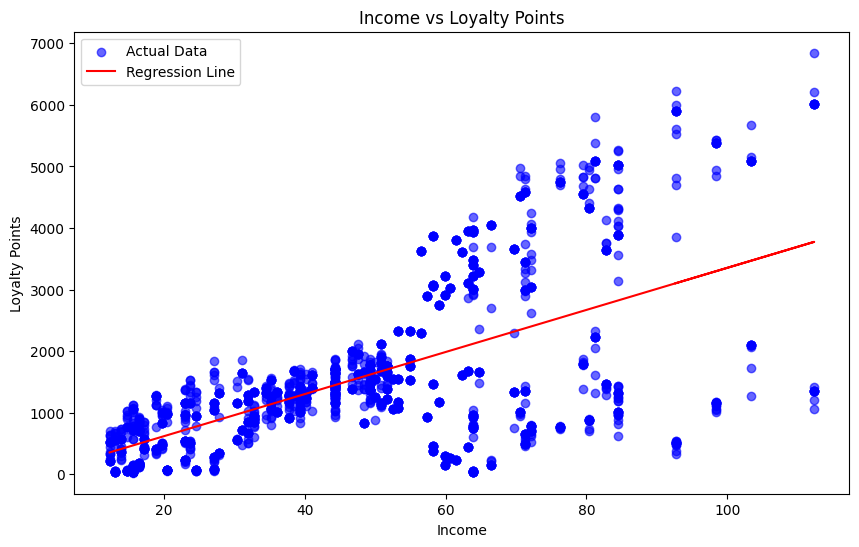

In [ ]:
# Plot graph with regression line.
plt.figure(figsize=(10,6))
plt.scatter(X_b, y_b, color='blue', alpha=0.6, label='Actual Data')  # Scatter plot for actual data
plt.plot(X_b, predicted_values_b, color='red', label='Regression Line')  # Regression line
plt.title('Income vs Loyalty Points')
plt.xlabel('Income')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

### Age vs Loyalty

In [ ]:
# Define independent variable.
X_c = df[['age']]  

# Define dependent variable.
y_c = df['loyalty_points']

# Create model and print summary of metrics.
model_c = sm.OLS(y_c, sm.add_constant(X_c))  # OLS regression (adding a constant for intercept)
results_c = model_c.fit()

# View the summary of the regression model
print(results_c.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 12 Apr 2025   Prob (F-statistic):             0.0577
Time:                        11:19:28   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [ ]:
# Extract the estimated parameters.
params_c = results_c.params
print("\nEstimated Parameters (Coefficients):")
print(params_c)

# Extract the standard errors.
std_errors_c = results_c.bse
print("\nStandard Errors:")
print(std_errors_c)

# Extract the predicted values.
predicted_values_c = results_c.fittedvalues
print("\nPredicted Values:")
print(predicted_values_c)


Estimated Parameters (Coefficients):
const    1736.517739
age        -4.012805
dtype: float64

Standard Errors:
const    88.248731
age       2.113177
dtype: float64

Predicted Values:
0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Length: 2000, dtype: float64


In [ ]:
# Set the X coefficient and the constant to generate the regression table.
# Generate the regression table
regression_table_c = pd.DataFrame({
    'Observed': y_c,
    'Predicted': predicted_values_c,
    'Residuals': y_c - predicted_values_c
})

# View the output.
print("\nRegression Table:")
print(regression_table_c.head())


Regression Table:
   Observed    Predicted    Residuals
0       210  1664.287247 -1454.287247
1       524  1644.223221 -1120.223221
2        40  1648.236026 -1608.236026
3       562  1636.197611 -1074.197611
4       366  1604.095169 -1238.095169


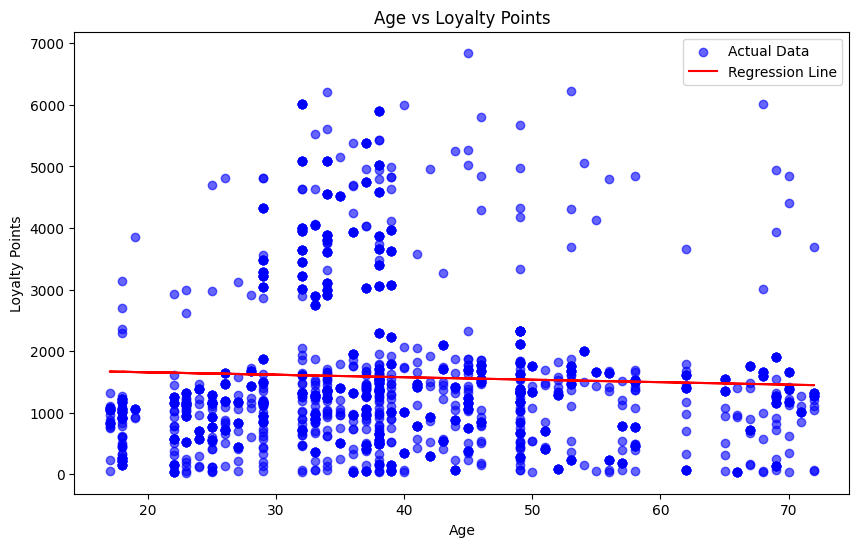

In [ ]:
# Plot graph with regression line.
plt.figure(figsize=(10,6))
plt.scatter(X_c, y_c, color='blue', alpha=0.6, label='Actual Data')  # Scatter plot for actual data
plt.plot(X_c, predicted_values_c, color='red', label='Regression Line')  # Regression line
plt.title('Age vs Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

### Observations and Insights

The linear regression analysis for spending score (5a) demonstrated that spending behavior is a significant factor influencing loyalty points. The regression model revealed an R-squared value of 0.452, indicating that approximately 45% of the variability in loyalty points can be explained by the spending score. The coefficient for spending score was found to be 33.061693, indicating that for every unit increase in spending score, loyalty points increase by approximately 33 units. This insight suggests that higher spending correlates strongly with increased loyalty points accumulation, emphasizing the importance of expenditure in boosting customer loyalty.

The analysis of remuneration (income) vs. loyalty points (5b) showed a lower relationship, with an R-squared value of 0.380. This indicates that income explains about 38% of the variability in loyalty points. The coefficient for remuneration was 34.187285, suggesting that an increase in income corresponds to a rise in loyalty points. However, the relationship is not as strong as spending behavior, with a relatively higher standard error (0.977925). This implies that while income plays a role in determining loyalty, its effect is less pronounced than that of spending behavior.

The analysis for age (5c) vs. loyalty points showed a very weak relationship, with an R-squared value of 0.002, explaining only 0.2% of the variability in loyalty points. The coefficient for age was -4.01285, suggesting a small but negative relationship between age and loyalty points. However, this relationship is statistically insignificant, as indicated by the p-value of 0.131, which is above the typical threshold of 0.05 for statistical significance. This suggests that age does not have a meaningful impact on loyalty points, and thus, age may not be a crucial factor in the customer retention strategy.

# Exploring the structure using decision trees.

In [ ]:
# Settings for the notebook
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
# Specify Y.
y = df['loyalty_points']
# Specify X.
X = df.drop(columns=['loyalty_points'])

In [ ]:
# Review X and Y.
print(X.shape)
X.head(), y.head()

(2000, 8)


(   gender  age  remuneration (k£)  spend_score education  product  \
 0    Male   18              12.30           39  graduate      453   
 1    Male   23              12.30           81  graduate      466   
 2  Female   22              13.12            6  graduate      254   
 3  Female   25              13.12           77  graduate      263   
 4  Female   33              13.94           40  graduate      291   
 
                                               review  \
 0  When it comes to a DM's screen, the space on t...   
 1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
 2  Nice art, nice printing.  Why two panels are f...   
 3  Amazing buy! Bought it as a gift for our new d...   
 4  As my review of GF9's previous screens these w...   
 
                                              summary  
 0  The fact that 50% of this space is wasted on a...  
 1  Another worthless Dungeon Master's screen from...  
 2                    pretty, but also pretty useless  
 3        

### Create train and test data sets.

In [ ]:
# Split the data into test and train data.
# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [ ]:
print(X_train.shape, X_test.shape)

(1400, 2410) (600, 2410)


### Create Decision tree regressor

In [ ]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Prune the model.
pruned_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
pruned_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Evaluate performance before pruning
y_pred = regressor.predict(X_test)
mse_before_pruning = mean_squared_error(y_test, y_pred)

# Evaluate performance after pruning
y_pred_pruned = pruned_regressor.predict(X_test)
mse_after_pruning = mean_squared_error(y_test, y_pred_pruned)

print(f"Mean Squared Error before pruning: {mse_before_pruning}")
print(f"Mean Squared Error after pruning: {mse_after_pruning}")

Mean Squared Error before pruning: 9908.411666666667
Mean Squared Error after pruning: 70141.93736352725


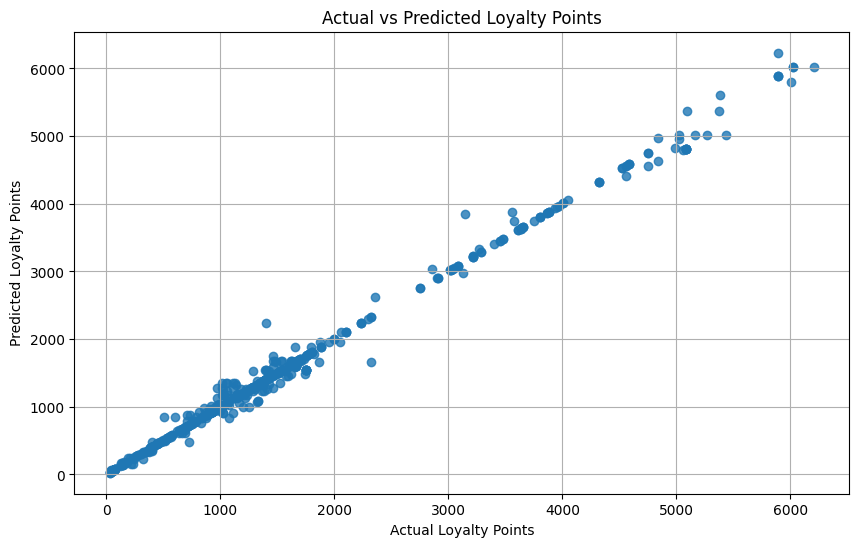

In [ ]:
# Plot actual vs predicted loyalty points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#1f77b4', alpha=0.8)
plt.title('Actual vs Predicted Loyalty Points')
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.grid(True)
plt.show()

In [ ]:
# Select features
X = df[['age', 'remuneration (k£)', 'spend_score']]
y = df['loyalty_points']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE (Linear Regression):", mse)
print("R² (Linear Regression):", r2)

MSE (Linear Regression): 277188.702332206
R² (Linear Regression): 0.8290723396315802


### Fit and plot final model.

In [ ]:
# Prepare simple features for the decision tree
X_simple = df[['age', 'remuneration (k£)', 'spend_score']]
y_simple = df['loyalty_points']

In [ ]:
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42)

In [ ]:
simple_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
simple_tree.fit(X_train_simple, y_train_simple)

DecisionTreeRegressor(max_depth=3, random_state=42)

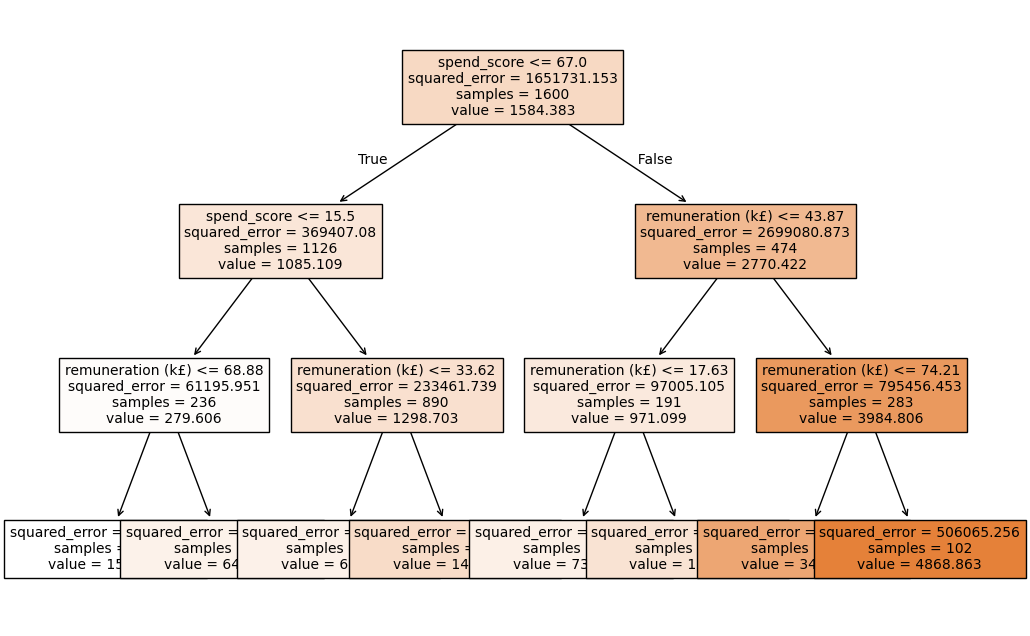

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(simple_tree,
          filled=True,
          feature_names=['age', 'remuneration (k£)', 'spend_score'],
          fontsize=10)
plt.show()

### Observations and Insights

The decision tree analysis helped identify the most important drivers of loyalty points in the dataset. After simplifying the input features and training a pruned tree (max_depth = 3), the model highlighted clear patterns in customer behaviour.

The most important feature was spend score, which appeared at the top of the tree and influenced the first split. This was followed by remuneration (k£), which further refined predictions within each spend score segment. This suggests that both spending behaviour and income levels are strong predictors of loyalty accumulation.

From a business perspective, this model can support more targeted strategies. For example, customers with high spend scores and higher income levels are likely to accumulate significantly more loyalty points. Turtle Games could prioritise these customer segments with exclusive loyalty offers or tailored engagement strategies.

While pruning slightly increased the model’s error, it resulted in a simpler and more interpretable structure — making it ideal for stakeholder discussions and business decision-making. The final tree clearly visualises how customer characteristics influence loyalty outcomes in a way that's accessible for non-technical teams.

# Clustering with *k*-means using Python

In [ ]:
# Load the CSV file as df2.
df2 = pd.read_csv(data_path)

# View DataFrame.
df2.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [ ]:
# Drop unnecessary columns.
print(df.columns)
df3 = df2[['remuneration (k£)', 'spending_score (1-100)']]
print(df3.isnull().sum())

Index(['gender', 'age', 'remuneration (k£)', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
remuneration (k£)         0
spending_score (1-100)    0
dtype: int64


In [ ]:
# Explore the data.
df3.head()

,remuneration (k£),spending_score (1-100)
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [ ]:
print("\nDescriptive Statistics:")
print(df3.describe())


Descriptive Statistics:
       remuneration (k£)  spending_score (1-100)
count        2000.000000             2000.000000
mean           48.079060               50.000000
std            23.123984               26.094702
min            12.300000                1.000000
25%            30.340000               32.000000
50%            47.150000               50.000000
75%            63.960000               73.000000
max           112.340000               99.000000


### Plot

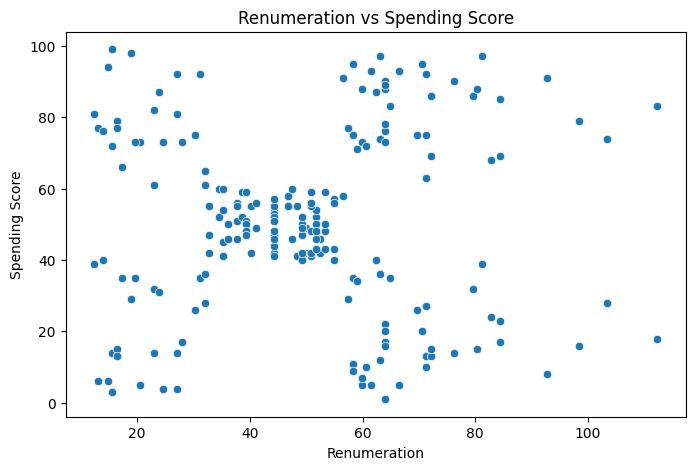

In [ ]:
# Create a scatterplot with Seaborn.
plt.figure(figsize=(8,5))
sns.scatterplot(x=df3['remuneration (k£)'], y=df3['spending_score (1-100)'])
plt.title("Renumeration vs Spending Score")
plt.xlabel("Renumeration")
plt.ylabel("Spending Score")
plt.show()

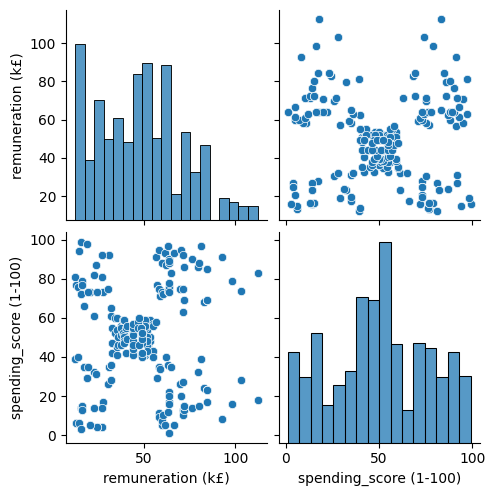

In [ ]:
# Create a pairplot with Seaborn.
sns.pairplot(df3)
plt.show()

### Elbow and Silhoutte Methods

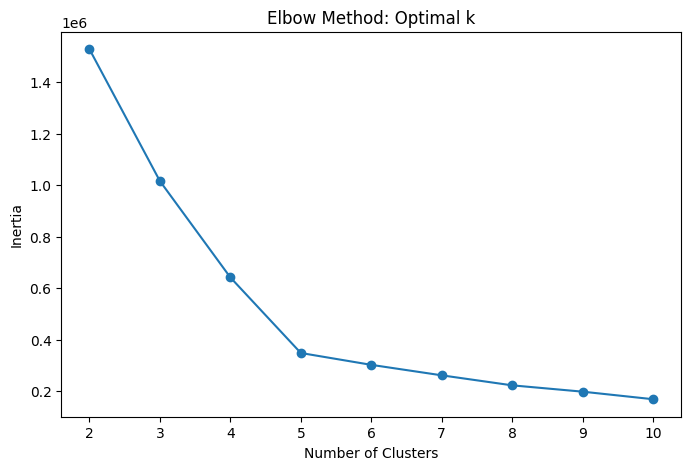

In [ ]:
# Determine the number of clusters: Elbow method.
inertia = []
k_values = range(2, 11)  # Try different k values

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)  # Store inertia values

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method: Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

The optimal k is where the elbow bends (point of diminishing returns)

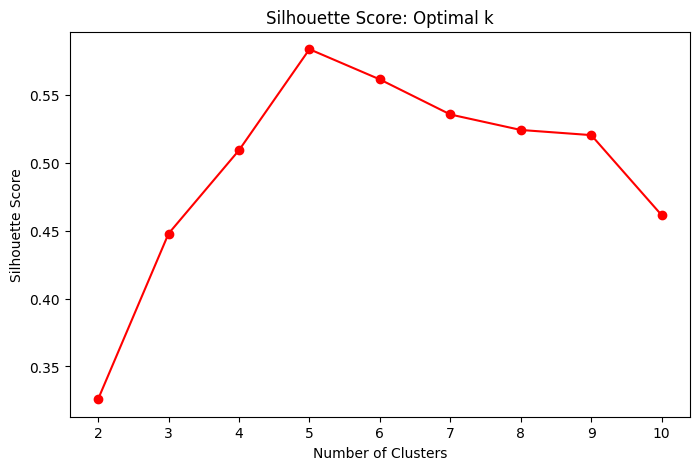

In [ ]:
# Determine the number of clusters: Silhouette method.
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df3)
    silhouette_scores.append(silhouette_score(df3, labels))

# Plot Silhouette Method
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o', color='r')
plt.title("Silhouette Score: Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

### Evaluate k-means model at different values of *k*

In [ ]:
# Choose optimal k based on Elbow & Silhouette methods
optimal_k = 5  # from results above

# Select only the features needed for clustering
df3 = df2[['remuneration (k£)', 'spending_score (1-100)']].copy()

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df3['Cluster'] = kmeans.fit_predict(df3)

# Check cluster sizes
print(df3['Cluster'].value_counts())

# Final cluster centers
print(pd.DataFrame(kmeans.cluster_centers_, columns=['Renumeration', 'Spending Score']))

Cluster
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64
   Renumeration  Spending Score
0     73.240281       82.008427
1     44.418786       49.529716
2     74.831212       17.424242
3     20.353680       79.416357
4     20.424354       19.763838


### Fit Final Model

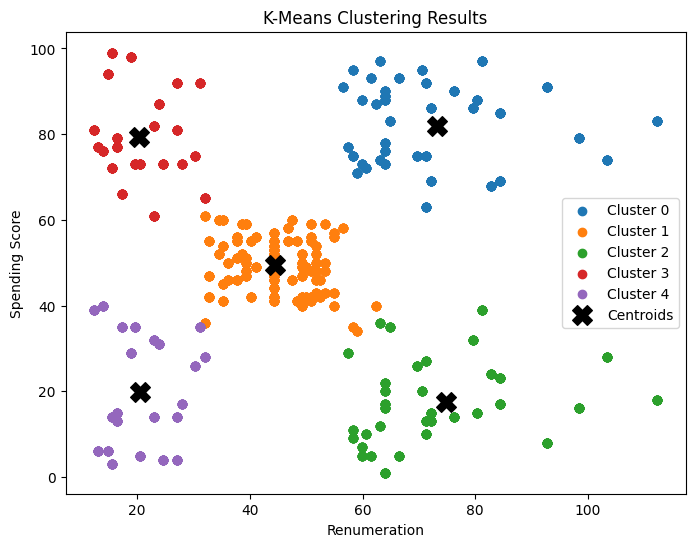

In [ ]:
# Apply the final model.
# Fit K-Means with chosen k (e.g., k=3)
best_k = 5  # based on Elbow/Silhouette results
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df3['Cluster'] = kmeans.fit_predict(df3)

# Scatter Plot of Clusters
plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    cluster_data = df3[df3['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.xlabel('Renumeration')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

In [ ]:
# Check the number of observations per predicted class.

cluster_counts = df3['Cluster'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['Cluster', 'Number of Observations']
print(cluster_counts)

   Cluster  Number of Observations
0        0                     356
1        1                     774
2        2                     330
3        3                     269
4        4                     271


### Insights and Observations

The clusters reveal distinct customer segments based on remuneration and spending score

These segments can help the business target marketing strategies, such as offering premium services to high-remuneration, 
high-spending customers, or discounts to low-remuneration, low-spending customers to boost engagement.

# NLP using Python

In [ ]:
# Keep necessary columns. Drop unnecessary columns.
df = df[['review', 'summary']]

In [ ]:
# View DataFrame
df

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [ ]:
# Determine if there are any missing values.
print(df.isnull().sum())

review     0
summary    0
dtype: int64


### Prepare the Data for NLP
##### Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.
df['review'] = df['review'].str.lower()

In [ ]:
# Summary: Change all to lower case and join with a space.
df['summary'] = df['summary'].str.lower()

##### Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.
df['review'] = df['review'].str.replace(f"[{string.punctuation}]", " ", regex=True)

# View output.
print(df['review'])

0       when it comes to a dm s screen  the space on t...
1       an open letter to galeforce9  \n\nyour unpaint...
2       nice art  nice printing   why two panels are f...
3       amazing buy  bought it as a gift for our new d...
4       as my review of gf9 s previous screens these w...
                              ...                        
1995    the perfect word game for mixed ages  with mom...
1996    great game   did not think i would like it whe...
1997    great game for all         \nkeeps the mind ni...
1998                                            fun game 
1999    this game is fun  a lot like scrabble without ...
Name: review, Length: 2000, dtype: object


In [ ]:
# Replace all the puncuations in summary column.
df['summary'] = df['summary'].str.replace(f"[{string.punctuation}]", " ", regex=True)

# View output.
print(df['summary'])

0       the fact that 50  of this space is wasted on a...
1       another worthless dungeon master s screen from...
2                         pretty  but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995       the perfect word game for mixed ages  with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object


In [ ]:
# Drop duplicates in both columns.
df.drop_duplicates(inplace=True)

# View DataFrame.
print(df)

                                                 review  \
0     when it comes to a dm s screen  the space on t...   
1     an open letter to galeforce9  \n\nyour unpaint...   
2     nice art  nice printing   why two panels are f...   
3     amazing buy  bought it as a gift for our new d...   
4     as my review of gf9 s previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages  with mom...   
1996  great game   did not think i would like it whe...   
1997  great game for all         \nkeeps the mind ni...   
1998                                          fun game    
1999  this game is fun  a lot like scrabble without ...   

                                                summary  
0     the fact that 50  of this space is wasted on a...  
1     another worthless dungeon master s screen from...  
2                       pretty  but also pretty useless  
3                                            five stars  
4

##### Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).
df_nlp = df.copy()

# View DataFrame.
print(df_nlp)

                                                 review  \
0     when it comes to a dm s screen  the space on t...   
1     an open letter to galeforce9  \n\nyour unpaint...   
2     nice art  nice printing   why two panels are f...   
3     amazing buy  bought it as a gift for our new d...   
4     as my review of gf9 s previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages  with mom...   
1996  great game   did not think i would like it whe...   
1997  great game for all         \nkeeps the mind ni...   
1998                                          fun game    
1999  this game is fun  a lot like scrabble without ...   

                                                summary  
0     the fact that 50  of this space is wasted on a...  
1     another worthless dungeon master s screen from...  
2                       pretty  but also pretty useless  
3                                            five stars  
4

In [ ]:
# Apply tokenisation to both columns.
df_nlp["review_tokens"] = df_nlp["review"].dropna().apply(word_tokenize)
df_nlp["summary_tokens"] = df_nlp["summary"].dropna().apply(word_tokenize)

# View DataFrame.
print(df_nlp[["review_tokens", "summary_tokens"]].head())

                                       review_tokens  \
0  [when, it, comes, to, a, dm, s, screen, the, s...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9, s, previous, screens...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, master, s, scree...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]  


In [ ]:
# Review: Create a word cloud.
review_text = " ".join([" ".join(tokens) for tokens in df_nlp["review_tokens"].dropna()])
summary_text = " ".join([" ".join(tokens) for tokens in df_nlp["summary_tokens"].dropna()])

In [ ]:
# Review: Plot the WordCloud image.
def plot_wordcloud(text_series, title):
    text = " ".join(text_series.dropna())  # Join all text into a single string
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

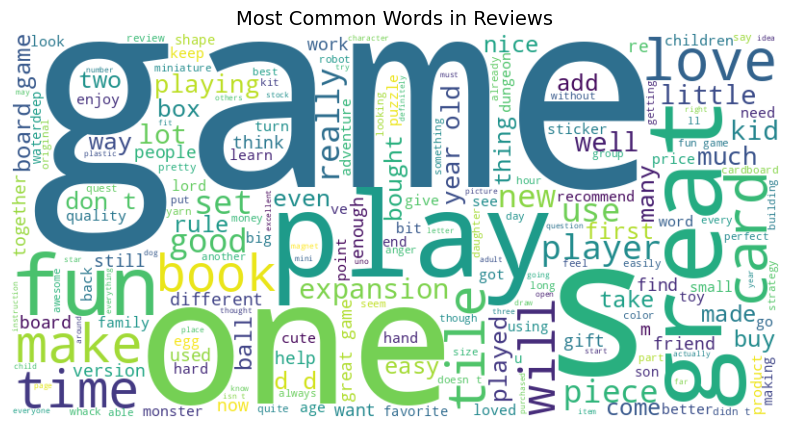

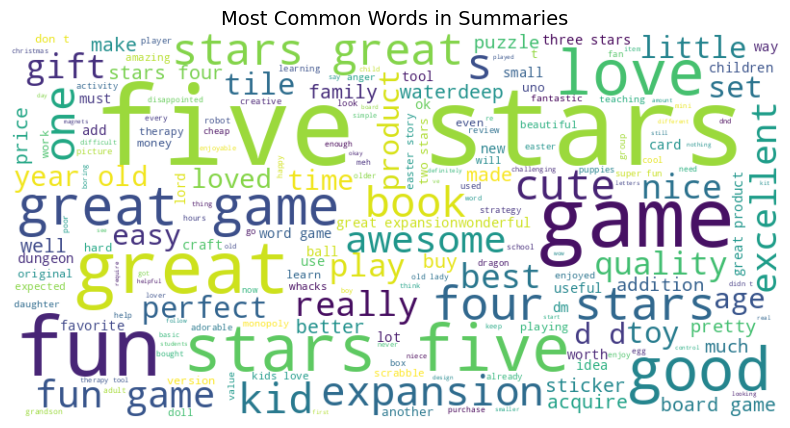

In [ ]:
# Summary: Create a word cloud.
plot_wordcloud(df["review"], "Most Common Words in Reviews")
plot_wordcloud(df["summary"], "Most Common Words in Summaries")

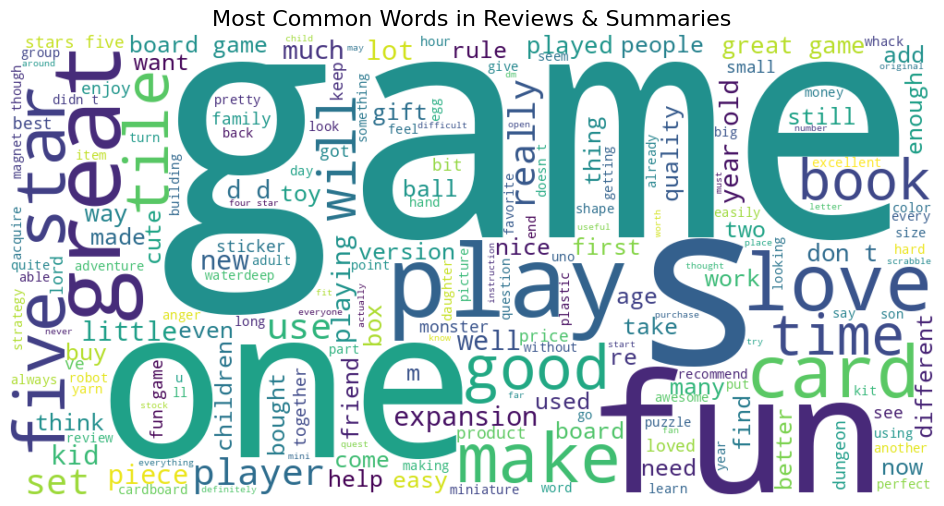

In [ ]:
# Combine both texts into one
combined_text = review_text + " " + summary_text

# Generate WordCloud
wordcloud = WordCloud(
    width=1000, 
    height=500, 
    background_color="white"
).generate(combined_text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews & Summaries", fontsize=16)
plt.show()

### Frequency distribution and polarity
##### Create frequency distribution

In [ ]:
# Determine the frequency distribution.
# Tokenise the text
tokens = word_tokenize(combined_text.lower())  # Convert to lowercase for consistency

# Count word frequencies
word_freq = Counter(tokens)

# Display the 15 most common words
print("Most common words:", word_freq.most_common(15))

Most common words: [('the', 5726), ('a', 3432), ('and', 3421), ('to', 3363), ('it', 2675), ('of', 2638), ('i', 2452), ('game', 2025), ('this', 1916), ('is', 1886), ('for', 1782), ('you', 1370), ('with', 1336), ('in', 1198), ('that', 1137)]


### Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.
# Get stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

# Function to clean and filter tokens
def clean_tokens(tokens):
    return [word for word in tokens if word.isalpha() and word not in stop_words and word not in punctuation_set]

# Apply cleaning
filtered_tokens = clean_tokens(tokens)

# Recompute frequency distribution
filtered_word_freq = Counter(filtered_tokens)

# Display the 15 most common words after cleaning
print("Most common words after cleaning:", filtered_word_freq.most_common(15))

Most common words after cleaning: [('game', 2025), ('great', 883), ('fun', 776), ('one', 579), ('play', 535), ('stars', 476), ('like', 475), ('love', 418), ('good', 385), ('five', 376), ('really', 349), ('get', 335), ('book', 321), ('tiles', 320), ('time', 316)]


In [ ]:
# Remove all the stopwords
wordcloud_filtered = WordCloud(
    width=1000, 
    height=500, 
    background_color="white"
).generate(" ".join(filtered_tokens))

### Create wordcloud without stopwords

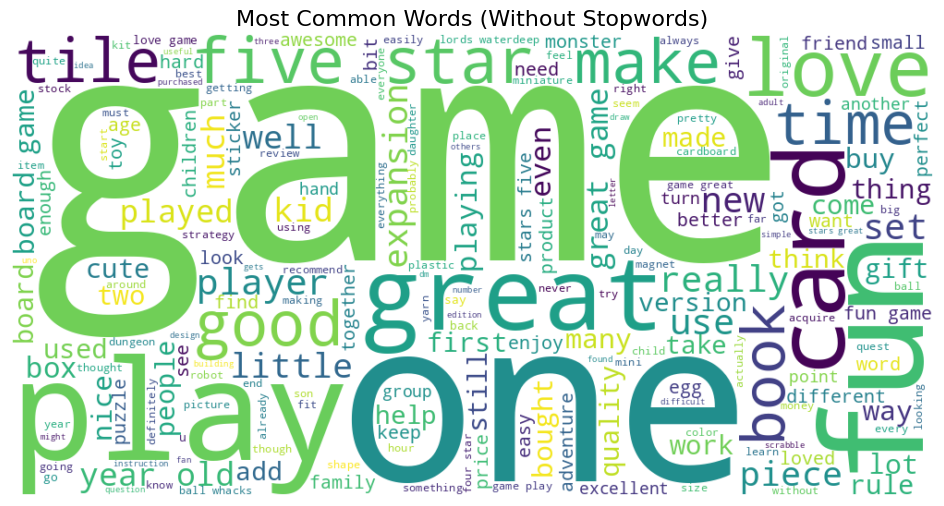

In [ ]:
# Create a wordcloud without stop words.
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_filtered, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words (Without Stopwords)", fontsize=16)
plt.show()

### Identify 15 most common words and polarity

In [ ]:
# Get 15 most common words
most_common_words = [word for word, _ in filtered_word_freq.most_common(15)]

# Compute polarity for each word
word_polarity = {word: TextBlob(word).sentiment.polarity for word in most_common_words}

# Display word polarity
print("Polarity of most common words:", word_polarity)

Polarity of most common words: {'game': -0.4, 'great': 0.8, 'fun': 0.3, 'one': 0.0, 'play': 0.0, 'stars': 0.0, 'like': 0.0, 'love': 0.5, 'good': 0.7, 'five': 0.0, 'really': 0.2, 'get': 0.0, 'book': 0.0, 'tiles': 0.0, 'time': 0.0}


### Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

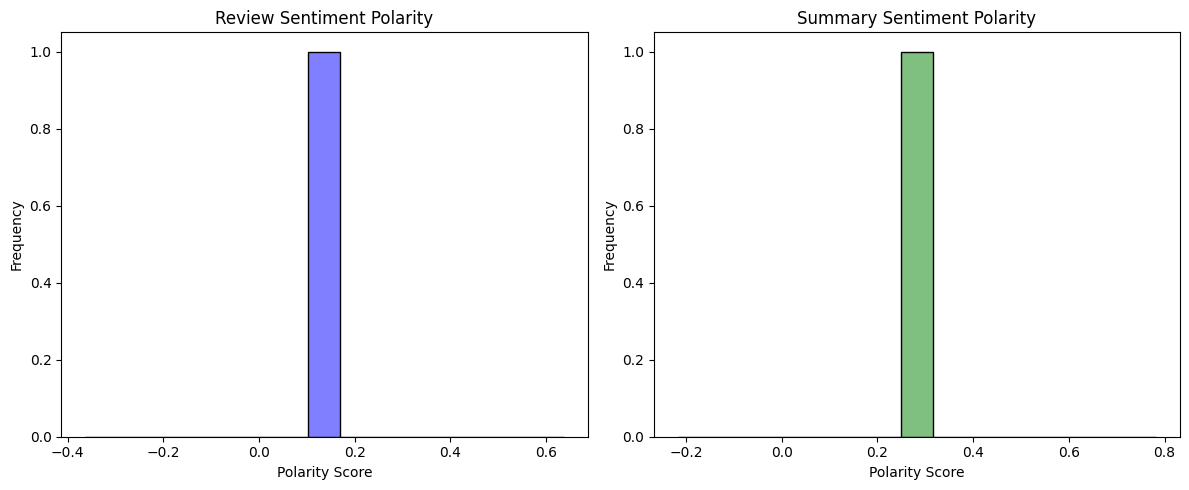

In [ ]:
# Determine polarity of both columns. 
# Compute polarity for reviews and summaries
review_polarity = [TextBlob(text).sentiment.polarity for text in review_text.split(".")]
summary_polarity = [TextBlob(text).sentiment.polarity for text in summary_text.split(".")]

# Create histograms
plt.figure(figsize=(12, 5))

# Reviews Polarity
plt.subplot(1, 2, 1)
sns.histplot(review_polarity, bins=15, kde=True, color="blue")
plt.title("Review Sentiment Polarity")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")

# Summaries Polarity
plt.subplot(1, 2, 2)
sns.histplot(summary_polarity, bins=15, kde=True, color="green")
plt.title("Summary Sentiment Polarity")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
# View output.
plt.tight_layout()
plt.show()

In [ ]:
# Review the sentiment for the various columns

review_sentiment = TextBlob(review_text).sentiment
summary_sentiment = TextBlob(summary_text).sentiment
print("Review Sentiment: ", review_sentiment)
print("Summary Sentiment: ", summary_sentiment)

Review Sentiment:  Sentiment(polarity=0.13680597393299745, subjectivity=0.502668465152045)
Summary Sentiment:  Sentiment(polarity=0.282346821258709, subjectivity=0.5654069704578528)


### Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.
def print_reviews(title, reviews):
    print(f"\n{title}:\n" + "-"*50)
    for i, review in enumerate(reviews, 1):
        print(f"{i}. {review[:20].strip()}...") 
        
df_reviews = pd.DataFrame({"review": review_text.split("."), "polarity": review_polarity})
top_negative_reviews = df_reviews.sort_values(by="polarity").head(20)

# View output.
top_negative_review_texts = top_negative_reviews["review"].tolist()
print_reviews("Top 20 Negative Reviews", top_negative_review_texts)


Top 20 Negative Reviews:
--------------------------------------------------
1. when it comes to a d...


In [ ]:
# Top 20 negative summaries.
df_summaries = pd.DataFrame({"summary": summary_text.split("."), "polarity": summary_polarity})
top_negative_summaries = df_summaries.sort_values(by="polarity").head(20)

# View output.
top_negative_summary_texts = top_negative_summaries["summary"].tolist()
print_reviews("Top 20 Negative Summaries", top_negative_summary_texts)


Top 20 Negative Summaries:
--------------------------------------------------
1. the fact that 50 of...


In [ ]:
# Top 20 positive reviews.
top_positive_reviews = df_reviews.sort_values(by="polarity", ascending=False).head(20)

# View output.
top_positive_review_texts = top_positive_reviews["review"].tolist()
print_reviews("Top 20 Positive Reviews", top_positive_review_texts)


Top 20 Positive Reviews:
--------------------------------------------------
1. when it comes to a d...


In [ ]:
# Top 20 positive summaries.
top_positive_summaries = df_summaries.sort_values(by="polarity", ascending=False).head(20)

# View output.
top_positive_summary_texts = top_positive_summaries["summary"].tolist()
print_reviews("Top 20 Positive Summaries", top_positive_summary_texts)


Top 20 Positive Summaries:
--------------------------------------------------
1. the fact that 50 of...


### Insights and Observations

The summaries have a narrower range of negative scores (from -0.2 to 0.8) and a more pronounced positive skew, suggesting that summaries tend to focus on more positive aspects of 
the reviews, possibly omitting some of the negative sentiments present in the full reviews.

Summaries appear to be more positively biased than the full reviews. This could be because summaries are designed to highlight key points, which might emphasize 
positive aspects (e.g., praise for the product) while downplaying negative ones (e.g., complaints).

The product is generally well-liked, as indicated by the positive sentiment in both reviews and summaries. However, the presence of some negative sentiment in 
the reviews suggests there are areas for improvement that might not be immediately obvious from the summaries.

The slight subjectivity in both reviews and summaries indicates that customers are sharing both factual and emotional feedback. 
A deeper analysis of the negative reviews could reveal specific issues (e.g., product defects, pricing concerns) that need to be addressed.